# IMDB reviews exploration.
## Author: Vadym Tunik.

Dataset: Large Movie Review Dataset https://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import matplotlib.pyplot as plt

import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import contextual_search_system_for_related_texts as c
from bow_model import BagOfWords, clean_text

C:\Users\duina\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### System that offers five IMDB reviews that are similar to the given one.
### (we intuitively believe that the user who wrote the review will be interested in finding a movie that evokes similar impressions)

In [2]:
c.DATA_FRACTION = 1.
texts = c.load_texts_from_folder(c.FOLDER_PATH, fraction=c.DATA_FRACTION)
bow_model = BagOfWords(use_bigrams=c.USE_BIGRAMS)
bow_matrix = bow_model.fit_transform(texts, vocab_min_frequency=c.VOCAB_MIN_FREQUENCY)

similar_indices, similar_distances = c.find_similar_texts(
    bow_matrix,
    chosen_index=c.CHOSEN_TEXT_INDEX,
    num_similar=c.NUM_RELATED_TO_FIND,
    metric='cosine'
)

print(f"\n--- Similarity Results ---")
chosen_text_original = texts[c.CHOSEN_TEXT_INDEX]
cleaned_chosen_text = clean_text(chosen_text_original)
print(f"\nChosen Text #{c.CHOSEN_TEXT_INDEX} (Cleaned Snippet):")
print(cleaned_chosen_text[:c.CHAR_LIMIT_FOR_TEXT] + ('...' if len(cleaned_chosen_text) > c.CHAR_LIMIT_FOR_TEXT else ''))

print(f"\nTop {c.NUM_RELATED_TO_FIND} Most Similar Texts:")
for i in range(len(similar_indices)):
    index = similar_indices[i]
    distance = similar_distances[i]
    related_text_original = texts[index]
    cleaned_related_text = clean_text(related_text_original)

    print(f"\nRank {i+1}: Text #{index} with Distance: {distance:.2f}")
    print(cleaned_related_text[:c.CHAR_LIMIT_FOR_TEXT] + ('...' if len(cleaned_related_text) > c.CHAR_LIMIT_FOR_TEXT else ''))


Loading data from: C:\Users\duina\repo\DA\imdb_reviews_analysis\aclImdb\train\unsup
Attempting to load 50000 files (100.0% of total 50000 text files)...
Successfully loaded 50000 out of 50000 attempted texts.

Starting BoW process (use_bigrams=False)...
Step 1: Cleaning and tokenizing texts...
____ Processed 1000 texts...
____ Processed 2000 texts...
____ Processed 3000 texts...
____ Processed 4000 texts...
____ Processed 5000 texts...
____ Processed 6000 texts...
____ Processed 7000 texts...
____ Processed 8000 texts...
____ Processed 9000 texts...
____ Processed 10000 texts...
____ Processed 11000 texts...
____ Processed 12000 texts...
____ Processed 13000 texts...
____ Processed 14000 texts...
____ Processed 15000 texts...
____ Processed 16000 texts...
____ Processed 17000 texts...
____ Processed 18000 texts...
____ Processed 19000 texts...
____ Processed 20000 texts...
____ Processed 21000 texts...
____ Processed 22000 texts...
____ Processed 23000 texts...
____ Processed 24000 te

In [3]:
def plot_similarity_reduction(X_reduced, chosen_idx, similar_idxs, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='lightblue', alpha=0.5, s=10, label='Other Texts')

    if len(similar_idxs) > 0:
        plt.scatter(X_reduced[similar_idxs, 0], X_reduced[similar_idxs, 1], c='orange',
                    alpha=0.9, s=30, label=f'Top {len(similar_idxs)} Similar Texts')

    plt.scatter(X_reduced[chosen_idx, 0], X_reduced[chosen_idx, 1], c='red',
                marker='X', s=150, label=f'Chosen Text (#{chosen_idx})', edgecolors='black')

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

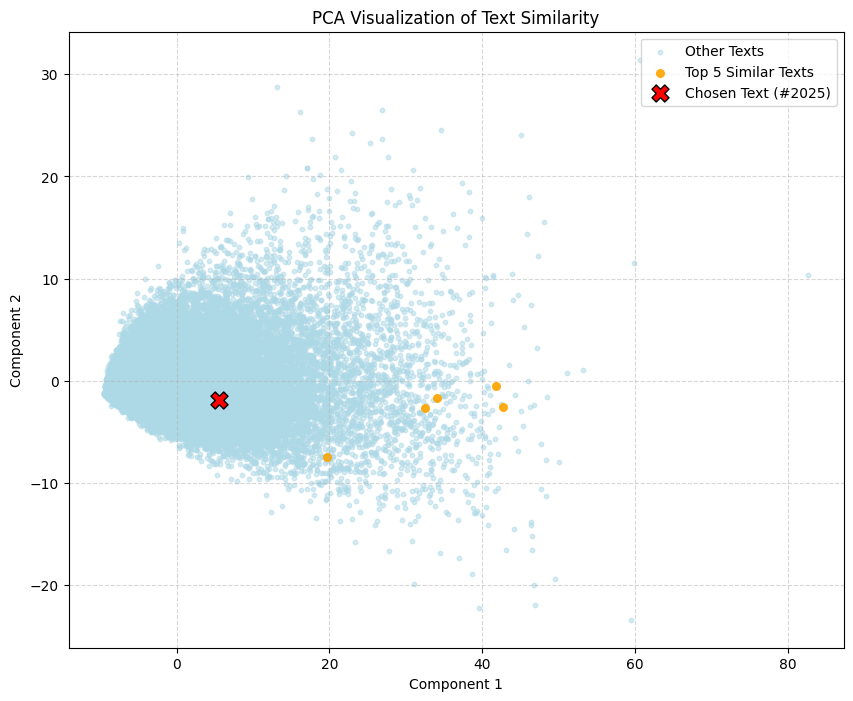

c:\Users\duina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


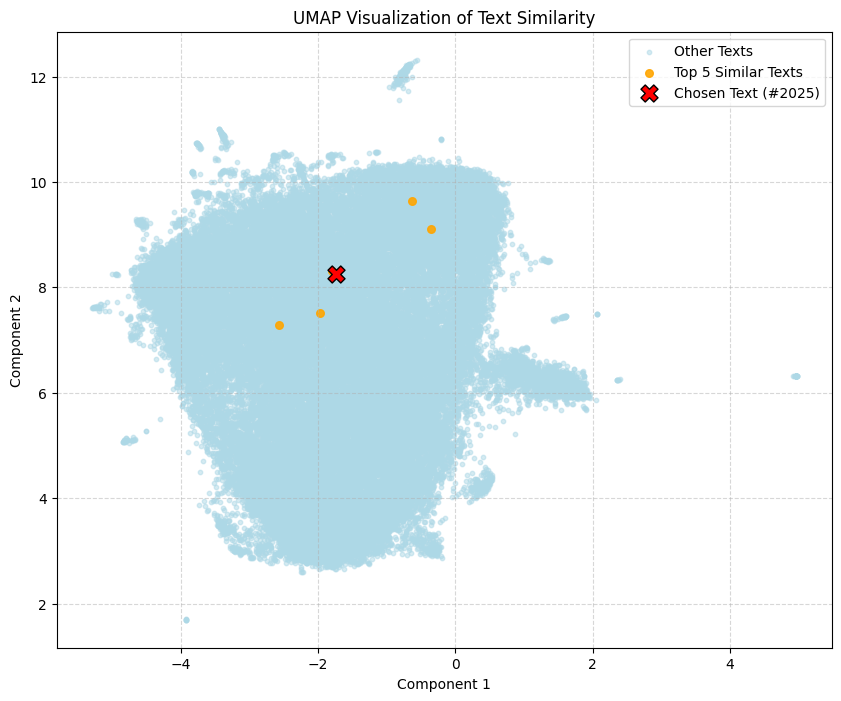

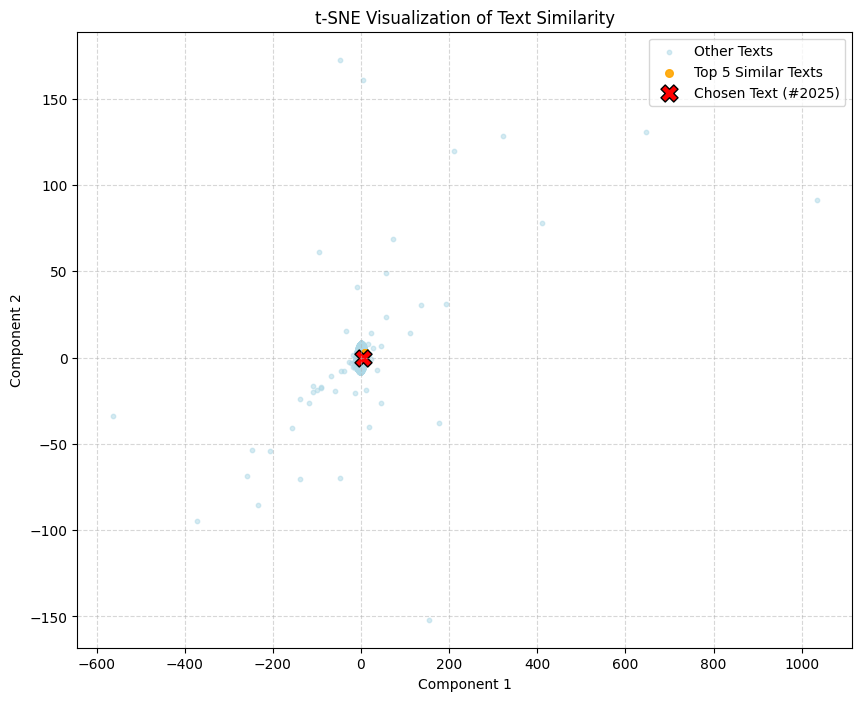

In [4]:
# PCA
pca = PCA(n_components=2,)
X_pca = pca.fit_transform(bow_matrix)
plot_similarity_reduction(X_pca, c.CHOSEN_TEXT_INDEX, similar_indices, "PCA Visualization of Text Similarity")

# UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='cosine')
X_umap = umap_reducer.fit_transform(bow_matrix) 
plot_similarity_reduction(X_umap, c.CHOSEN_TEXT_INDEX, similar_indices, "UMAP Visualization of Text Similarity")

# t-SNE
tsne_model = TSNE(n_components=2, perplexity=min(30.0, bow_matrix.shape[0] - 1), max_iter=300)
X_tsne_reduced = tsne_model.fit_transform(bow_matrix)
plot_similarity_reduction(X_tsne_reduced, c.CHOSEN_TEXT_INDEX, similar_indices, "t-SNE Visualization of Text Similarity")